## Анализ распространённости ключевых слов

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10, 6))
plt.rc('lines', linewidth=1)

In [2]:
ROOT_PATH = os.path.split(os.getcwd())[0]
DATA_PATH = os.path.join(ROOT_PATH, 'data', 'interim')

In [3]:
def get_entries(filename):
    def match_field(field):
        return re.match(f'{field} = (.*)\n$', next(infile)).groups()[0]

    with open(filename, 'r') as infile:
        while True:
            dct = {}
            try:
                line = next(infile)
                assert line == '[paper]\n'
            except StopIteration:
                return
            dct['title'] = match_field('title')
            dct['authors'] = match_field('authors').split(';')
            dct['journal'] = match_field('journal')
            dct['year'] = int(match_field('year'))
            dct['volume'] = match_field('volume')
            dct['issue'] = match_field('issue')
            dct['abstract'] = match_field('abstract')
            dct['paper citations'] = int(match_field('paper citations'))
            dct['patent citations'] = int(match_field('patent citations'))
            views = match_field('full text views')
            dct['full text views'] = int(views) if views != 'None' else None
            dct['open access'] = bool(match_field('open access'))
            dct['DOI'] = match_field('DOI')
            dct['URL'] = match_field('URL')
            dct['keywords'] = match_field('IEEE Keywords').split(';')
            next(infile)  # skip empty line
            yield dct

### Распределение ключевых слов по частотам для разных журналов

Text(0.5, 1.0, 'ieee-proc: 11699 papers / 5064 unique keywords')

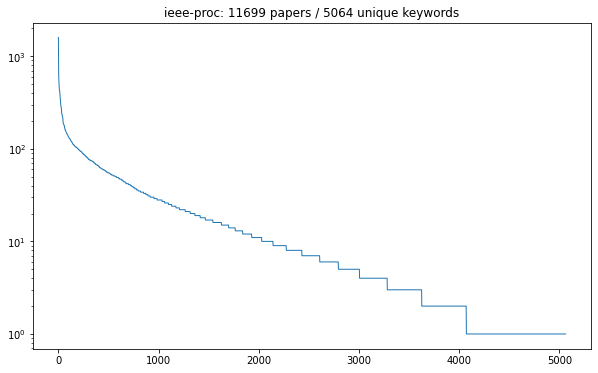

In [4]:
cur_file = os.path.join(DATA_PATH, 'ieee-proc.txt')
keywords_proc = {}
num_papers = 0
for dct in get_entries(cur_file):
    num_papers += 1
    for keyword in dct['keywords']:
        keywords_proc[keyword] = keywords_proc.get(keyword, 0) + 1

plt.figure()
plt.semilogy(sorted((v for k, v in keywords_proc.items()), reverse=True))
plt.title(f'ieee-proc: {num_papers} papers / {len(keywords_proc)} unique keywords')

Text(0.5, 1.0, 'ieee-tac: 17227 papers / 2855 unique keywords')

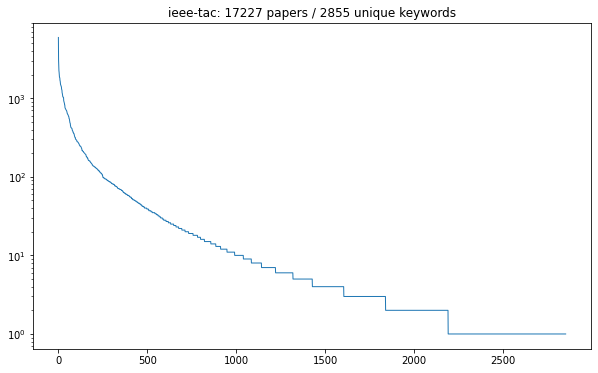

In [5]:
cur_file = os.path.join(DATA_PATH, 'ieee-tac.txt')
keywords_tac = {}
num_papers = 0
for dct in get_entries(cur_file):
    num_papers += 1
    for keyword in dct['keywords']:
        keywords_tac[keyword] = keywords_tac.get(keyword, 0) + 1

plt.close('all')
plt.figure()
plt.semilogy(sorted((v for k, v in keywords_tac.items()), reverse=True))
plt.title(f'ieee-tac: {num_papers} papers / {len(keywords_tac)} unique keywords')

Text(0.5, 1.0, 'ieee-ted: 17328 papers / 3195 unique keywords')

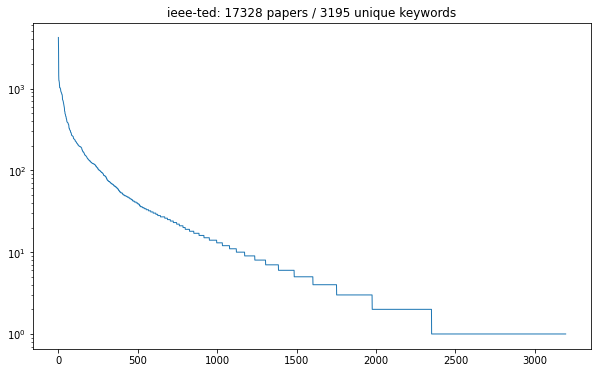

In [6]:
cur_file = os.path.join(DATA_PATH, 'ieee-ted.txt')
keywords_ted = {}
num_papers = 0
for dct in get_entries(cur_file):
    num_papers += 1
    for keyword in dct['keywords']:
        keywords_ted[keyword] = keywords_ted.get(keyword, 0) + 1

plt.close('all')
plt.figure()
plt.semilogy(sorted((v for k, v in keywords_ted.items()), reverse=True))
plt.title(f'ieee-ted: {num_papers} papers / {len(keywords_ted)} unique keywords')

Объединим все ключевые слова посчитаем сколько раз они встречаются во всех аннотациях.

In [7]:
keywords_all = {}
for dct in (keywords_proc, keywords_tac, keywords_ted):
    for kw in dct:
        keywords_all[kw] = keywords_all.get(kw, 0) + dct[kw]
keywords_all_lst = [(k, v) for k, v in keywords_all.items()]
keywords_all_lst.sort(key=lambda t: t[1], reverse=True)
keywords = [k for k, _ in keywords_all_lst]
counts_all = [v for _, v in keywords_all_lst]
counts_proc = [keywords_proc.get(k, 0) for k in keywords]
counts_ted = [keywords_ted.get(k, 0) for k in keywords]
counts_tac = [keywords_tac.get(k, 0) for k in keywords]
print(f'total: {len(keywords_all)} keywords')

total: 5965 keywords


Выберем `NUM_KEYWORDS` самых распространённых ключевых слов, и проверим, как они распределены по журналам.

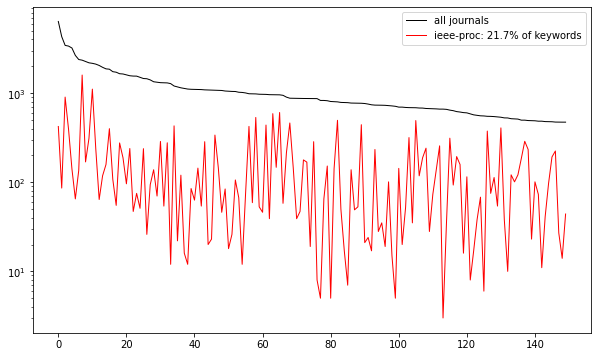

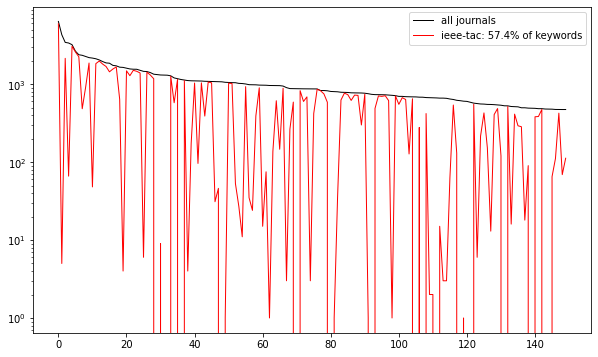

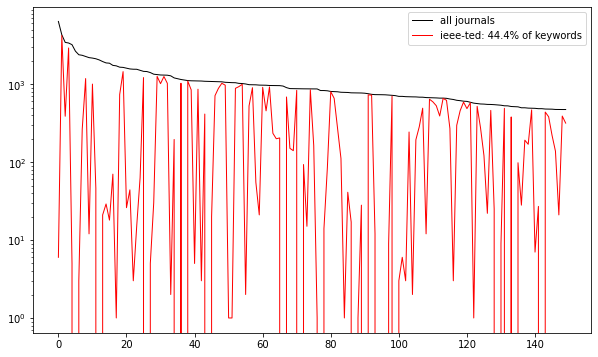

In [8]:
NUM_KEYWORDS = 150#len(keywords)
journals = ('ieee-proc', 'ieee-tac', 'ieee-ted')

plt.close('all')
for counts, journal in zip((counts_proc, counts_tac, counts_ted), journals):
    total = sum(counts)
    selection = sum(counts[:NUM_KEYWORDS])
    label = f'{journal}: {selection / total * 100:.1f}% of keywords'

    plt.figure()
    plt.semilogy(counts_all[:NUM_KEYWORDS], 'k-', label='all journals')
    plt.semilogy(counts[:NUM_KEYWORDS], 'r-', label=label)
    plt.legend()

Посчитаем, в какой доле статей указаны выбранные ключевые слова.

In [9]:
selected_papers = 0
total_papers = 0
selected_keywords = set(keywords[:NUM_KEYWORDS])
for journal in ('ieee-proc', 'ieee-tac', 'ieee-ted'):
    cur_file = os.path.join(DATA_PATH, journal + '.txt')
    for dct in get_entries(cur_file):
        paper_keywords = set(dct['keywords'])
        if len(selected_keywords.intersection(paper_keywords)) > 0:
            selected_papers += 1
        total_papers += 1

print(f'{selected_papers} / {total_papers} papers ({selected_papers / total_papers * 100:.1f}%)')

41910 / 46254 papers (90.6%)
